# Lab 7 (12-03-2024)

### **Boosted Trees**

1) XGBoost 
2) ADA Boost
3) CAT Boost


**dataset :** Housing price dataset

In [117]:
Registration_Number = "22011103048"
Name = "Roahith R"

# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

print("My name is " + Name + " and my roll no : " + Registration_Number)
print("Computer IP Address is: " + IPAddr)

My name is Roahith R and my roll no : 22011103048
Computer IP Address is: 10.17.160.16


In [118]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score

In [119]:
df = pd.read_csv("real_estate.csv")
df.head()

,Address,Rooms,Price,Bedroom2,Bathroom,Landsize,YearBuilt,Regionname,Suburb,Type
0,85 Turner St,2,1480000,2,1,202,NaN,Northern Metropolitan,Abbotsford,h
1,25 Bloomburg St,2,1035000,2,1,156,1900.0,Northern Metropolitan,Abbotsford,h
2,5 Charles St,3,1465000,3,2,134,1900.0,Northern Metropolitan,Abbotsford,h
3,40 Federation La,3,850000,3,2,94,NaN,Northern Metropolitan,Abbotsford,h
4,55a Park St,4,1600000,3,1,120,2014.0,Northern Metropolitan,Abbotsford,h


In [120]:

le = LabelEncoder()
# We combine the Regionname and Suburb columns for approx. estimation of location
# Then we use LabelEncoder to convert the Location column to numerical data
df["Location"] = df["Regionname"] + " " + df["Suburb"]
df["Location"] = le.fit_transform(df["Location"])

# We also encode the house type column
df["Type"] = le.fit_transform(df["Type"])

# We drop the Address, Regionname and Suburb columns
df.drop(["Address","Regionname", "Suburb"], axis=1, inplace=True)


## To rank the year built column,as new house as top (expensive) (0-8)
def year_mapping(x):
    if x < 1800:
        return 8
    elif  1800 <= x <= 1850:
        return 7
    elif  1851 <= x <= 1900:
        return 6
    elif 1901 <= x <= 1920:
        return 5
    elif 1921 <= x <= 1950:
        return 4
    elif 1951 <= x <= 1980:
        return 3
    elif 1981 <= x <= 2000:
        return 2
    elif 2001 <= x <= 2023:
        return 1
    else :
        return 0

# To change Year built column to categorical data
df["YearBuilt"] = df["YearBuilt"].apply(year_mapping).fillna(0)


# Landsize : Used MinMax Scaler, Landsize is scaled from 0 to 1
min_max_scaler = MinMaxScaler()
df["Landsize"] = min_max_scaler.fit_transform(df[["Landsize"]])
df.head()

,Rooms,Price,Bedroom2,Bathroom,Landsize,YearBuilt,Type,Location
0,2,1480000,2,1,0.000466,0,0,70
1,2,1035000,2,1,0.000360,6,0,70
2,3,1465000,3,2,0.000309,6,0,70
3,3,850000,3,2,0.000217,0,0,70
4,4,1600000,3,1,0.000277,1,0,70


<Axes: >

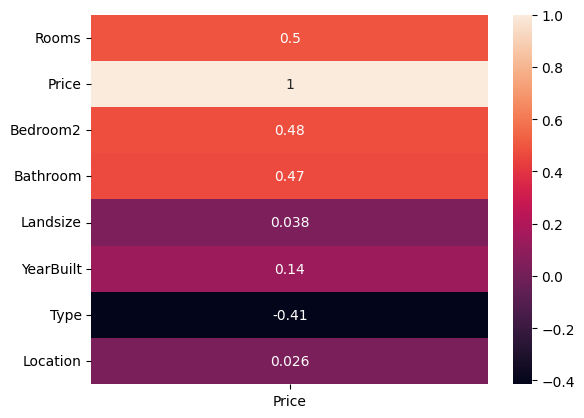

In [121]:
correlation_matrix = df.corr()['Price']
sns.heatmap(correlation_matrix.to_frame(), annot=True)

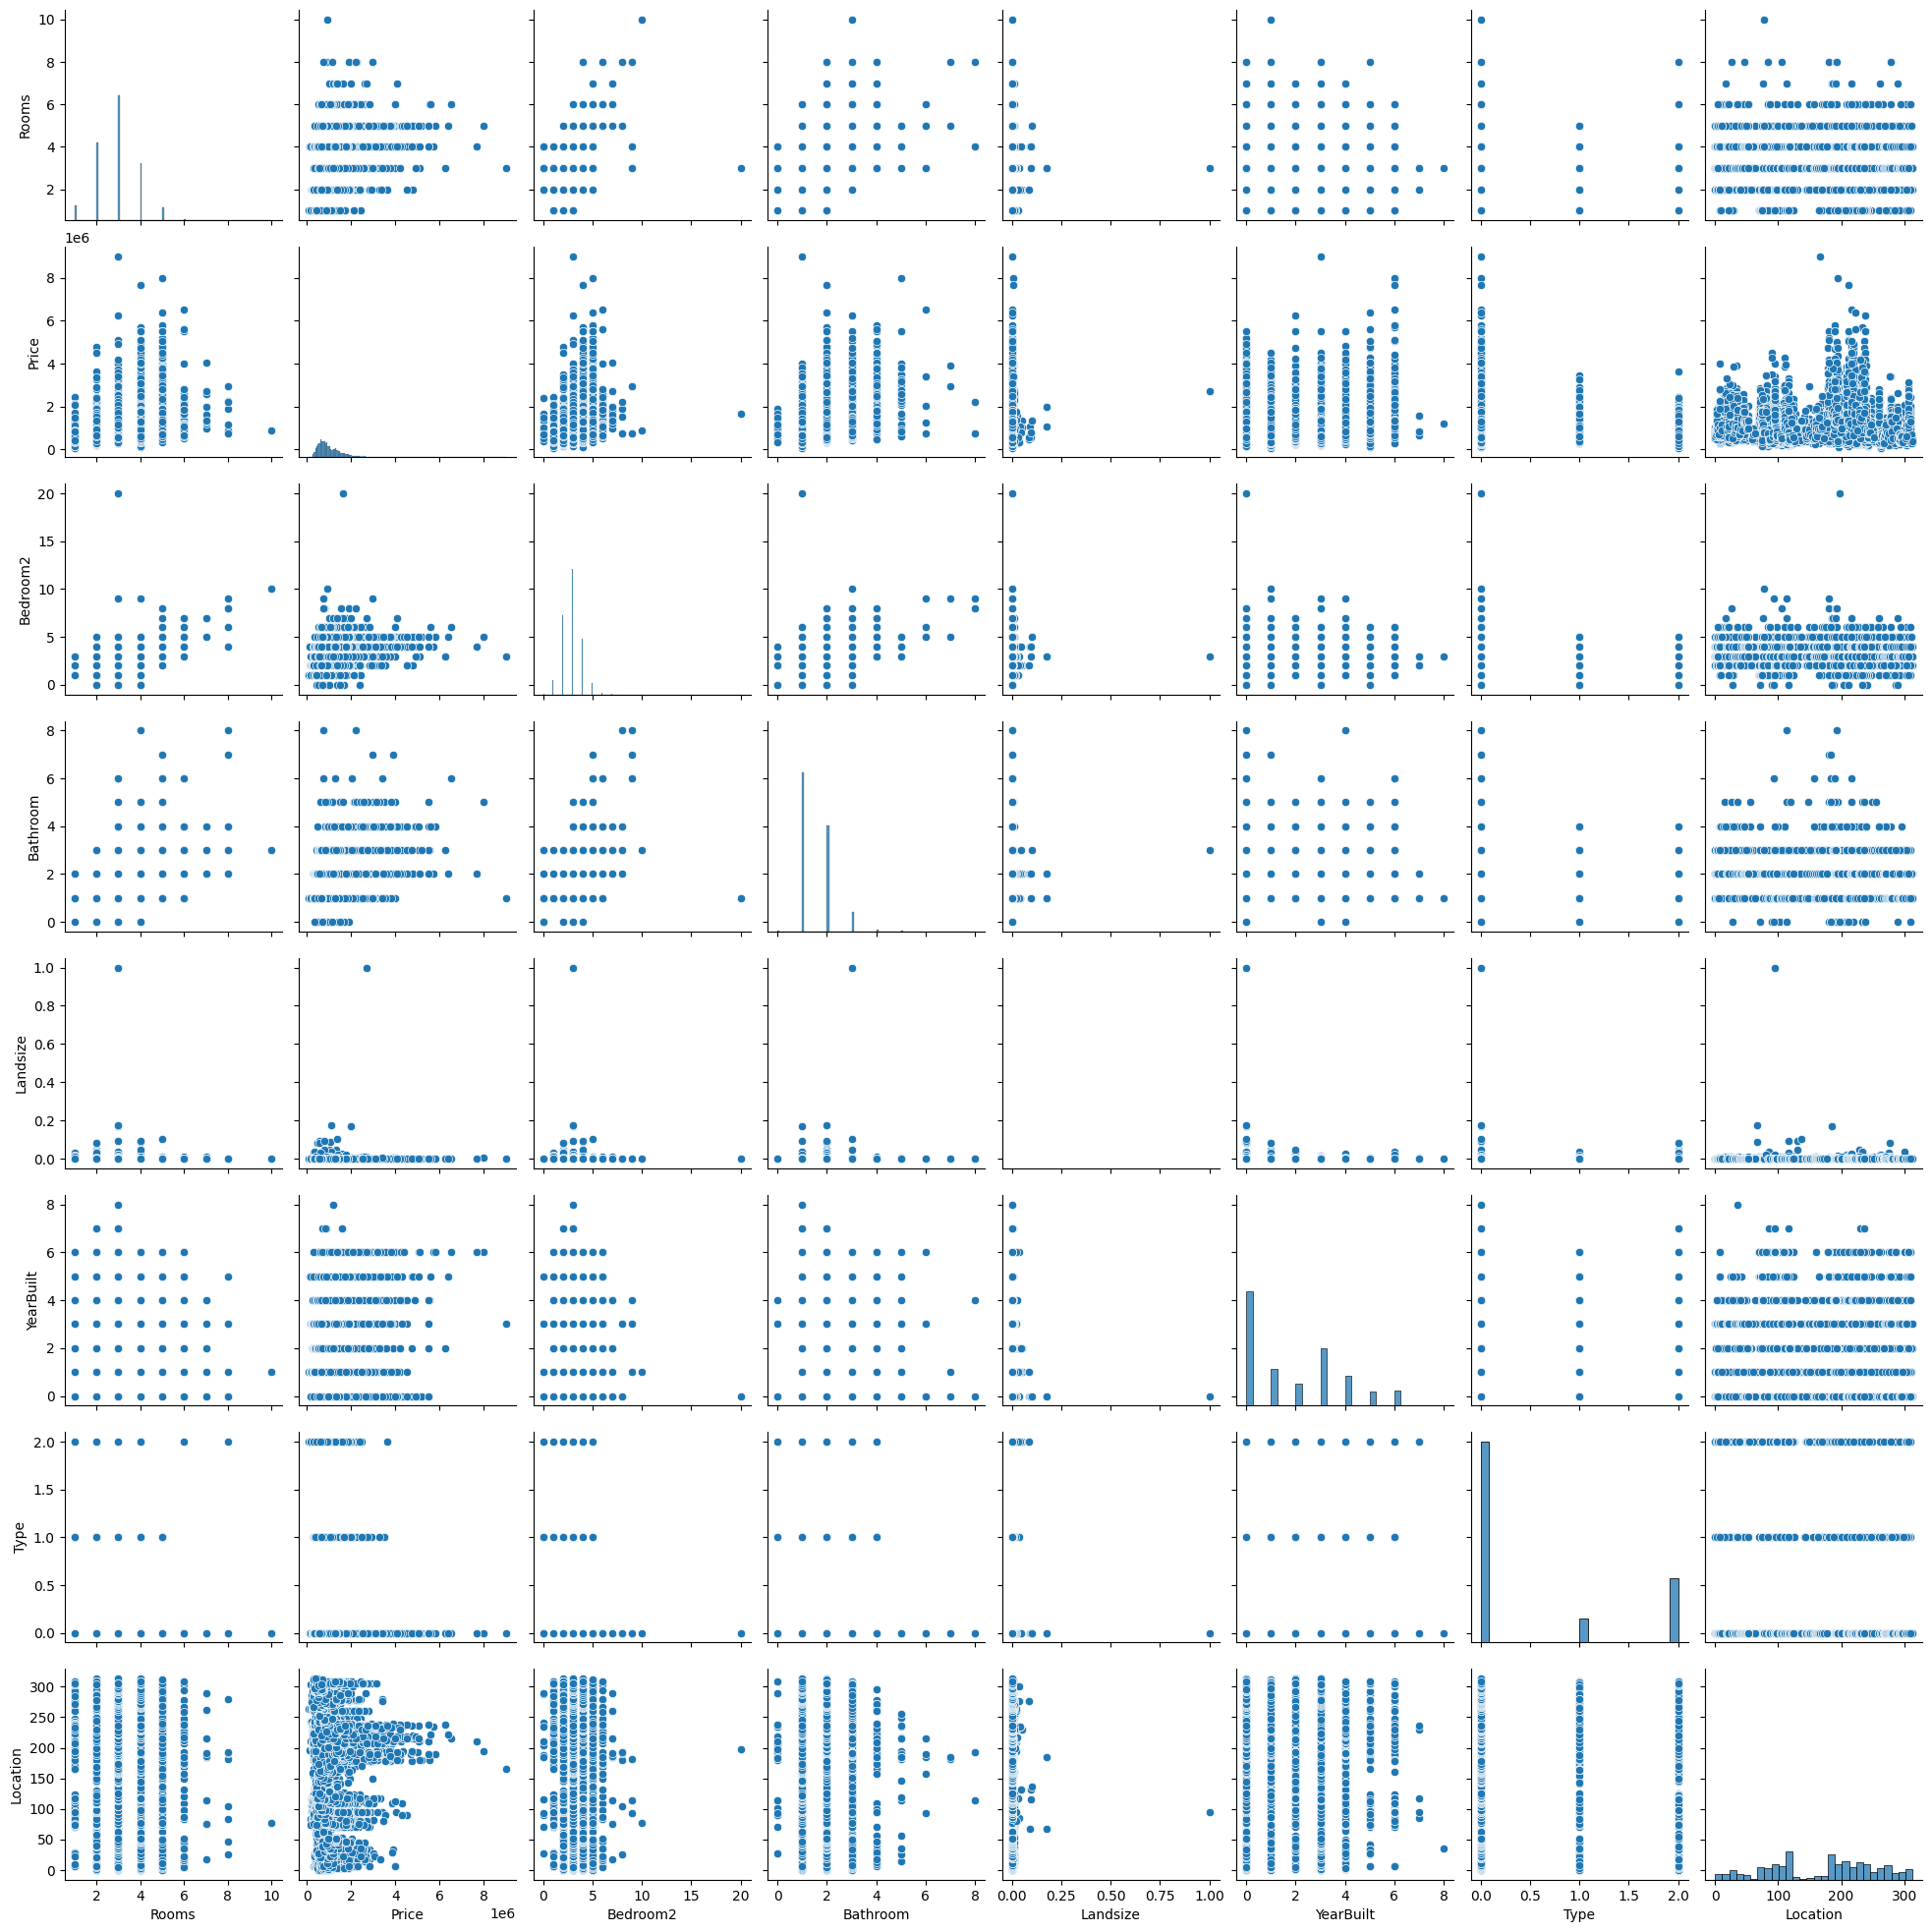

In [122]:
sns.pairplot(df)
plt.show()

In [123]:
# Split Dataset

x = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target variable

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=49)

## XGBoost Trees

In [124]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Train XGBoost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 100)
xg_reg.fit(x_train, y_train)

# Predict on test set
y_pred = xg_reg.predict(x_test)

# Evaluate model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Feature importance analysis
xg_feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': xg_reg.feature_importances_})
print(xg_feature_importance)

RMSE: 328457.1624896741
     Feature  Importance
0      Rooms    0.362688
1   Bedroom2    0.064113
2   Bathroom    0.150244
3   Landsize    0.039193
4  YearBuilt    0.108463
5       Type    0.172203
6   Location    0.103097


## CAT Boost

In [125]:
from catboost import CatBoostRegressor

# Initialize CatBoostRegressor
catmodel = CatBoostRegressor(iterations=100, learning_rate=0.5  , depth=5, loss_function='RMSE')

# Fit the model
catmodel.fit(x_train, y_train, eval_set=(x_test, y_test), verbose=False)

# Make predictions
y_pred = catmodel.predict(x_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Feature importance analysis
cat_feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': xg_reg.feature_importances_})
print(cat_feature_importance)

Root Mean Squared Error (RMSE): 320545.7988857535
     Feature  Importance
0      Rooms    0.362688
1   Bedroom2    0.064113
2   Bathroom    0.150244
3   Landsize    0.039193
4  YearBuilt    0.108463
5       Type    0.172203
6   Location    0.103097


## Ada Boost

In [126]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize AdaBoostRegressor
adamodel = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, loss='square')

# Fit the model
adamodel.fit(x_train, y_train)

# Make predictions
y_pred = adamodel.predict(x_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Feature importance analysis
ada_feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': adamodel.feature_importances_})
print(ada_feature_importance)

Root Mean Squared Error (RMSE): 646110.7864498545
     Feature  Importance
0      Rooms    0.035462
1   Bedroom2    0.027784
2   Bathroom    0.033058
3   Landsize    0.476353
4  YearBuilt    0.151690
5       Type    0.052720
6   Location    0.222932


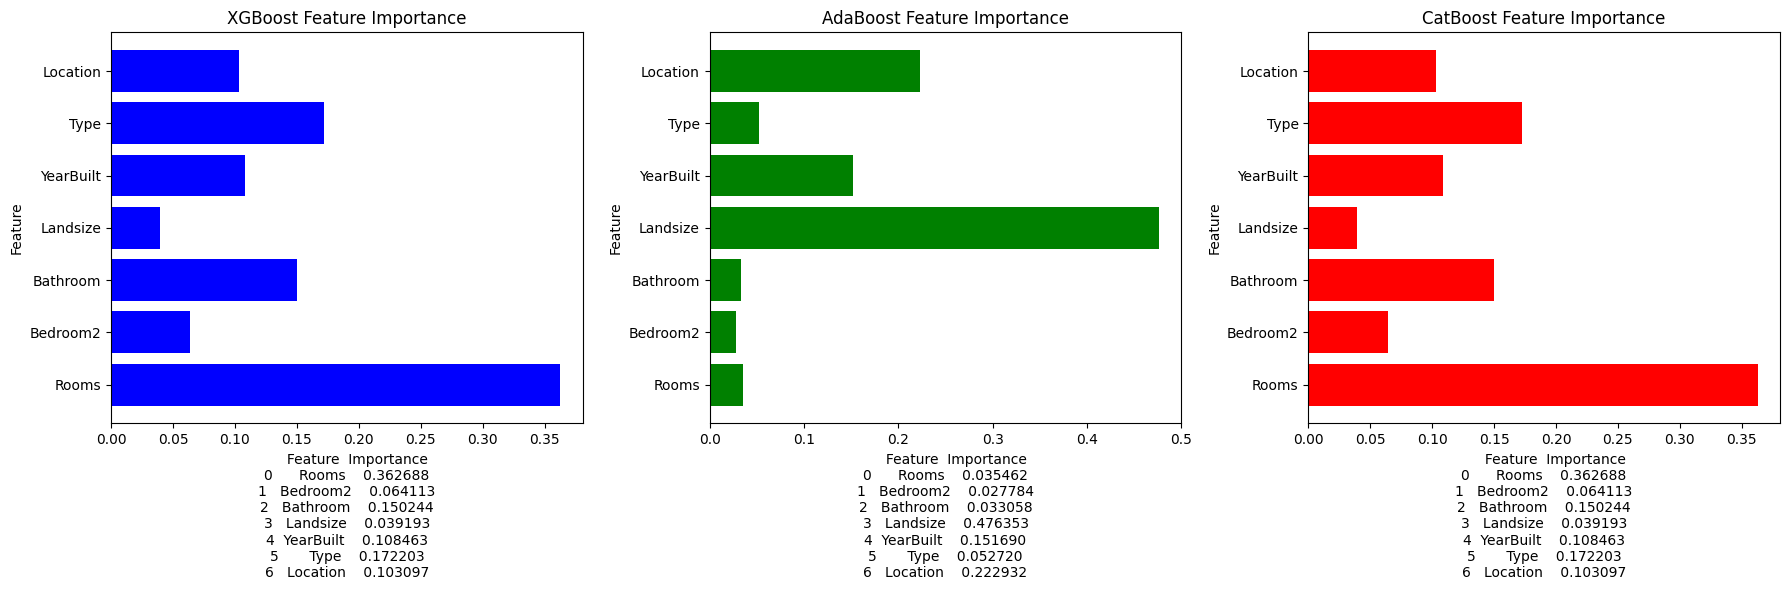

In [127]:


feature_importance = [xg_feature_importance, ada_feature_importance, cat_feature_importance]
colors = ['blue', 'green', 'red']
name = ['XGBoost', 'AdaBoost', 'CatBoost']


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i,imp in enumerate(feature_importance):
    axs[i].barh(y=imp['Feature'], width=imp['Importance'], color=colors[i])
    axs[i].set_title(name[i] + ' Feature Importance')
    axs[i].set_xlabel(f'{imp}')
    axs[i].set_ylabel('Feature')

plt.tight_layout()
plt.show()


0:	learn: 538629.5869626	total: 3.86ms	remaining: 382ms
1:	learn: 456728.3755458	total: 8.96ms	remaining: 439ms
2:	learn: 425839.4308194	total: 12.1ms	remaining: 392ms
3:	learn: 412786.0998158	total: 15.1ms	remaining: 363ms
4:	learn: 406034.9183351	total: 18.1ms	remaining: 344ms
5:	learn: 396018.1835259	total: 21.2ms	remaining: 333ms
6:	learn: 392309.1814325	total: 23.9ms	remaining: 317ms
7:	learn: 389831.8437273	total: 26.4ms	remaining: 303ms
8:	learn: 385863.6402827	total: 28.6ms	remaining: 289ms
9:	learn: 383097.0590482	total: 30.9ms	remaining: 278ms
10:	learn: 381738.5433771	total: 33.1ms	remaining: 267ms
11:	learn: 380143.0941809	total: 35.8ms	remaining: 263ms
12:	learn: 378005.0250737	total: 38.2ms	remaining: 256ms
13:	learn: 373771.2299848	total: 40.7ms	remaining: 250ms
14:	learn: 373410.3881934	total: 42.9ms	remaining: 243ms
15:	learn: 371632.3675770	total: 45ms	remaining: 236ms
16:	learn: 369709.6584130	total: 47ms	remaining: 229ms
17:	learn: 367911.9963015	total: 49ms	remaini

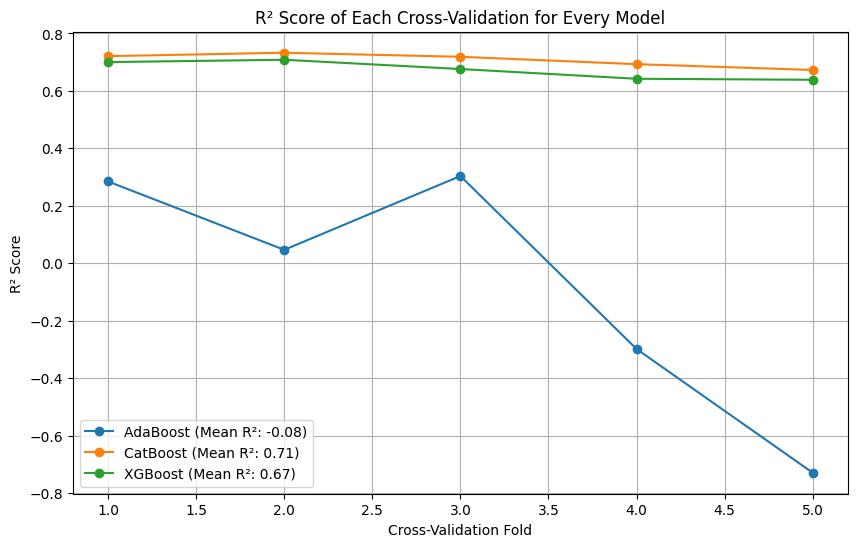

In [128]:



# Define the models (assuming adamodel, catmodel, and xg_reg are defined)
models = [("AdaBoost", adamodel), ("CatBoost", catmodel), ("XGBoost", xg_reg)]

# Perform cross-validation and get the R² scores
all_r2_scores = {model_name: [] for model_name, _ in models}

for model_name, model in models:
    r2_scores = cross_val_score(model, x, y, cv=5, scoring='r2')
    all_r2_scores[model_name].extend(r2_scores)

# Plot the R² scores
plt.figure(figsize=(10, 6))
for model_name, r2_scores in all_r2_scores.items():
    mean_r2 = np.mean(r2_scores)
    plt.plot(range(1, len(r2_scores)+1), r2_scores, marker='o', label=f"{model_name} (Mean R²: {mean_r2:.2f})")

plt.xlabel('Cross-Validation Fold')
plt.ylabel('R² Score')
plt.title('R² Score of Each Cross-Validation for Every Model')
plt.legend()
plt.grid(True)
plt.show()


## Results
| Model     | RMSE           | Max R²        |
|-----------|----------------|---------------|
| XGBoost   | 328457.16      | 0.7083        |
| CatBoost  | 320545.80      | 0.7328        |
| AdaBoost  | 594393.32      | 0.3208        |

## Conclusion

- Among the features, "Rooms" and "Type" appear to be the most important in determining the target variable across all models.  

- XGBoost and CatBoost demonstrate lower RMSE values compared to AdaBoost, suggesting better predictive performance. RMSE measures the average difference between predicted and actual values, with lower values indicating better model performance. The lower RMSE values of XGBoost and CatBoost imply that these models are more accurate in predicting real estate prices compared to AdaBoost.

- AdaBoost exhibits the lowest R² scores among the three models, indicating weaker explanatory power compared to XGBoost and CatBoost. R² measures the proportion of variance in the dependent variable (real estate prices) that is explained by the independent variables (features).

